In [12]:
from CustomXGBoost import (XGBRegressor,
                           XGBRegressorAdam,
                           XGBRegressorRMS,
                           XGBClassifier
                          )
import xgboost

In [10]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, log_loss, mean_absolute_error
import pandas as pd
import numpy as np
import seaborn as sns;sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

We'll use sklearn's diabetes dataset for evaluation

In [3]:
data = load_diabetes()
dataset = pd.DataFrame(data.data, columns=data.feature_names)
# split data into X and y
X = dataset
Y = data["target"]

test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=7)

In [4]:
results = dict() # to store results of each model

We'll use default values for parameters as given in XGBoost official Documentation

## XGBoost with Adam Optimizer

In [5]:
custom = XGBRegressorAdam() ## Adam Optimizer is used in this implementation while doing gradient boosting
custom.fit(X_train.values, y_train, eval_set = (X_test.values, y_test)) ## Check CustomXGBoost.py for implementation

y_pred = custom.predict(X_test.values)
results["Adam"] = custom.history

[0] validation_set-rmse : 70.7528930856603	[0] train_set-rmse : 77.67252928913183
[1] validation_set-rmse : 70.12902840400017	[1] train_set-rmse : 76.65038564857271
[2] validation_set-rmse : 69.35332686078266	[2] train_set-rmse : 75.46255816470534
[3] validation_set-rmse : 68.5897392807819	[3] train_set-rmse : 74.1687074245387
[4] validation_set-rmse : 67.82162488893127	[4] train_set-rmse : 72.80644924629905
[5] validation_set-rmse : 67.05220904617751	[5] train_set-rmse : 71.39102371966652
[6] validation_set-rmse : 66.25400762606795	[6] train_set-rmse : 69.9462153179027
[7] validation_set-rmse : 65.44717983935875	[7] train_set-rmse : 68.48607144878196
[8] validation_set-rmse : 64.64484663595937	[8] train_set-rmse : 67.02473391975211
[9] validation_set-rmse : 63.88218987773402	[9] train_set-rmse : 65.56772580477039
[10] validation_set-rmse : 63.17389444708086	[10] train_set-rmse : 64.1207000837676
[11] validation_set-rmse : 62.549635331263985	[11] train_set-rmse : 62.6864757723445
[12] 

[97] validation_set-rmse : 58.135152130251114	[97] train_set-rmse : 16.626336558191394
[98] validation_set-rmse : 58.15194523919698	[98] train_set-rmse : 16.44596868289292
[99] validation_set-rmse : 58.17059612151663	[99] train_set-rmse : 16.26553783508625


## XGBoost with RMSProp Optimizer

In [6]:
custom = XGBRegressorRMS()
custom.fit(X_train.values, y_train, eval_set = (X_test.values, y_test))

y_pred = custom.predict(X_test.values)
results["RMSprop"] = custom.history

[0] validation_set-rmse : 66.97774624677706	[0] train_set-rmse : 71.11615600163847
[1] validation_set-rmse : 63.78491447411068	[1] train_set-rmse : 66.06505405336955
[2] validation_set-rmse : 61.94198001744035	[2] train_set-rmse : 62.26835498176733
[3] validation_set-rmse : 60.69542852579092	[3] train_set-rmse : 59.1306916054687
[4] validation_set-rmse : 60.35100355445515	[4] train_set-rmse : 56.440578219003015
[5] validation_set-rmse : 60.075541235250974	[5] train_set-rmse : 54.113561692183715
[6] validation_set-rmse : 59.38647609729904	[6] train_set-rmse : 52.13431593205579
[7] validation_set-rmse : 59.01586881922398	[7] train_set-rmse : 50.271507378474084
[8] validation_set-rmse : 58.66371134422615	[8] train_set-rmse : 48.63312950537583
[9] validation_set-rmse : 58.18842025791387	[9] train_set-rmse : 47.153108176229765
[10] validation_set-rmse : 58.05527704454894	[10] train_set-rmse : 45.756142360692024
[11] validation_set-rmse : 57.8256687368538	[11] train_set-rmse : 44.34220872907

[96] validation_set-rmse : 57.546796236593764	[96] train_set-rmse : 10.447898685569573
[97] validation_set-rmse : 57.52068850223238	[97] train_set-rmse : 10.314120705650389
[98] validation_set-rmse : 57.55860773770601	[98] train_set-rmse : 10.174528534511182
[99] validation_set-rmse : 57.60825860205378	[99] train_set-rmse : 10.065238137402385


## Original XGBoost 

In [7]:
import xgboost
model = xgboost.XGBRegressor()
model.fit(X_train, y_train, verbose=True, eval_metric="rmse", eval_set=[(X_test, y_test)])

y_pred = model.predict(X_test)

[0]	validation_0-rmse:119.32756
[1]	validation_0-rmse:93.22636
[2]	validation_0-rmse:77.79602
[3]	validation_0-rmse:68.24764
[4]	validation_0-rmse:63.38055
[5]	validation_0-rmse:60.97445
[6]	validation_0-rmse:60.24472
[7]	validation_0-rmse:60.80915
[8]	validation_0-rmse:60.59282
[9]	validation_0-rmse:61.14302
[10]	validation_0-rmse:61.39846
[11]	validation_0-rmse:61.69669
[12]	validation_0-rmse:61.95347
[13]	validation_0-rmse:62.01958
[14]	validation_0-rmse:62.18780
[15]	validation_0-rmse:62.28210
[16]	validation_0-rmse:62.38843
[17]	validation_0-rmse:62.43783
[18]	validation_0-rmse:62.50838
[19]	validation_0-rmse:62.64378
[20]	validation_0-rmse:62.86266
[21]	validation_0-rmse:62.67214
[22]	validation_0-rmse:62.75052
[23]	validation_0-rmse:62.80328
[24]	validation_0-rmse:62.86892
[25]	validation_0-rmse:63.12924
[26]	validation_0-rmse:63.06793
[27]	validation_0-rmse:63.04744
[28]	validation_0-rmse:63.02758
[29]	validation_0-rmse:62.89526
[30]	validation_0-rmse:62.87672
[31]	validation_0

In [8]:
eval_res = model.evals_result()

## Comparing Performance

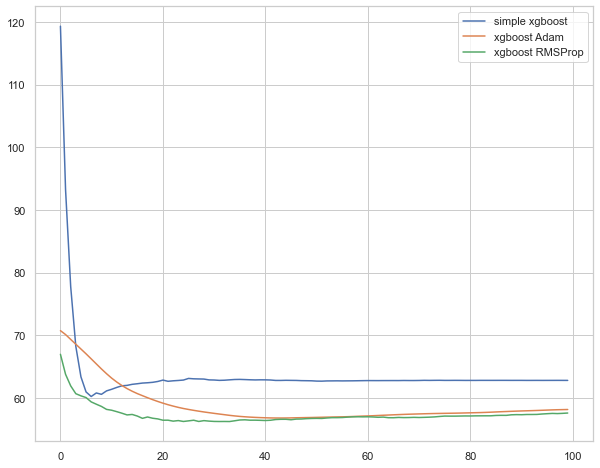

In [11]:
plt.figure(figsize=(10, 8))
sns.lineplot(y=eval_res["validation_0"]["rmse"], x=range(len(eval_res["validation_0"]["rmse"])), label="simple xgboost")
sns.lineplot(y = results['Adam']["test"], x = range(len(results['Adam']["test"])), label="xgboost Adam")
sns.lineplot(y = results['RMSprop']["test"], x = range(len(results['RMSprop']["test"])), label="xgboost RMSProp")

## Comparing CustomXGBoost with Original XGBoost

In [14]:
custom = XGBRegressor()
custom.fit(X_train.values, y_train, eval_set = (X_test.values, y_test))

y_pred = custom.predict(X_test.values)

[0] validation_set-rmse : 62.20998923459462	[0] train_set-rmse : 61.6388100479816
[1] validation_set-rmse : 59.96235273267726	[1] train_set-rmse : 49.56706463046613
[2] validation_set-rmse : 59.13410037709241	[2] train_set-rmse : 39.58608060958659
[3] validation_set-rmse : 60.240603998508064	[3] train_set-rmse : 32.39192242015271
[4] validation_set-rmse : 60.46175609043559	[4] train_set-rmse : 27.06104138044848
[5] validation_set-rmse : 59.81222723613043	[5] train_set-rmse : 23.495106513351974
[6] validation_set-rmse : 60.79925413047281	[6] train_set-rmse : 19.734204137001445
[7] validation_set-rmse : 60.87938481389498	[7] train_set-rmse : 17.269524083362114
[8] validation_set-rmse : 61.410392172449775	[8] train_set-rmse : 15.50432080738733
[9] validation_set-rmse : 61.51134653998612	[9] train_set-rmse : 13.851231511096923
[10] validation_set-rmse : 61.61949656552175	[10] train_set-rmse : 12.354215286802965
[11] validation_set-rmse : 61.48882869823704	[11] train_set-rmse : 11.396688059

[96] validation_set-rmse : 63.234406656400054	[96] train_set-rmse : 0.019233010494799918
[97] validation_set-rmse : 63.23431472447363	[97] train_set-rmse : 0.018128788424545586
[98] validation_set-rmse : 63.23453163139256	[98] train_set-rmse : 0.01627900504896643
[99] validation_set-rmse : 63.234574256479426	[99] train_set-rmse : 0.015843570197845592


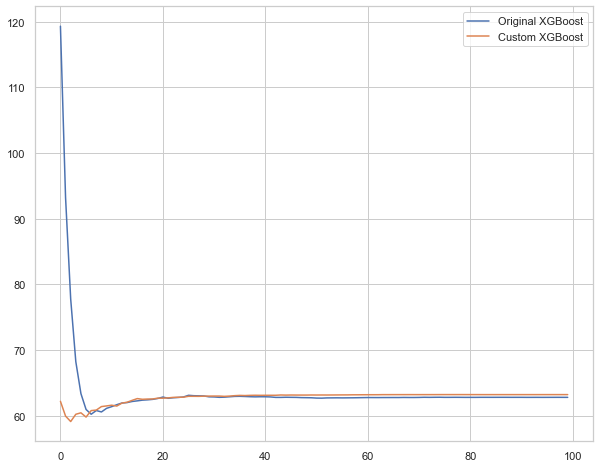

In [17]:
plt.figure(figsize=(10, 8))
sns.lineplot(y=eval_res["validation_0"]["rmse"], x=range(len(eval_res["validation_0"]["rmse"])), label="Original XGBoost")
sns.lineplot(y=custom.history["test"], x=range(len(custom.history["test"])), label="Custom XGBoost")